# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
#Loading the dataset
df_BreastCancer = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
print(df_BreastCancer.shape)

(699, 11)


In [5]:
df_BreastCancer.head(5)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [6]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [7]:
#Checking for Missing values
df_BreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
df_BreastCancer['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

df_BreastCancer['Bare Nuclei']=df_BreastCancer['Bare Nuclei'].replace("?","")
df_BreastCancer['Bare Nuclei']= df_BreastCancer['Bare Nuclei'].apply(pd.to_numeric)
df_BreastCancer['Bare Nuclei'].fillna(df_BreastCancer['Bare Nuclei'].mean(),inplace=True)

In [10]:
df_BreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [11]:
df_BreastCancer['Bare Nuclei'].value_counts()

1.000000     402
10.000000    132
5.000000      30
2.000000      30
3.000000      28
8.000000      21
4.000000      19
3.544656      16
9.000000       9
7.000000       8
6.000000       4
Name: Bare Nuclei, dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [12]:
df_BreastCancer.drop_duplicates(inplace=True)

In [13]:
df_BreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
ID                             691 non-null int64
ClumpThickness                 691 non-null int64
Cell Size                      691 non-null int64
Cell Shape                     691 non-null int64
Marginal Adhesion              691 non-null int64
Single Epithelial Cell Size    691 non-null int64
Bare Nuclei                    691 non-null float64
Normal Nucleoli                691 non-null int64
Bland Chromatin                691 non-null int64
Mitoses                        691 non-null int64
Class                          691 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.8 KB


In [14]:
#drop the Id column
df_BreastCancer.drop(columns=['ID'],inplace=True)

In [15]:
print(df_BreastCancer.columns)

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')


In [16]:
# Check for correlation of variable
corr=df_BreastCancer.corr()
corr

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643340,0.653752,0.487949,0.517448,0.588035,0.561076,0.535712,0.350354,0.716938
Cell Size,0.643340,1.000000,0.905420,0.713117,0.747111,0.684906,0.759525,0.727239,0.460064,0.817720
Cell Shape,0.653752,0.905420,1.000000,0.690989,0.714393,0.706537,0.738455,0.724693,0.440592,0.817693
Marginal Adhesion,0.487949,0.713117,0.690989,1.000000,0.608477,0.670708,0.669813,0.602453,0.417167,0.701371
Single Epithelial Cell Size,0.517448,0.747111,0.714393,0.608477,1.000000,0.578204,0.620518,0.634058,0.482644,0.681233
Bare Nuclei,0.588035,0.684906,0.706537,0.670708,0.578204,1.000000,0.674385,0.580961,0.339299,0.813809
Normal Nucleoli,0.561076,0.759525,0.738455,0.669813,0.620518,0.674385,1.000000,0.669059,0.343821,0.756618
Bland Chromatin,0.535712,0.727239,0.724693,0.602453,0.634058,0.580961,0.669059,1.000000,0.427644,0.715540
Mitoses,0.350354,0.460064,0.440592,0.417167,0.482644,0.339299,0.343821,0.427644,1.000000,0.424111
Class,0.716938,0.817720,0.817693,0.701371,0.681233,0.813809,0.756618,0.715540,0.424111,1.000000


In [17]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
corr.style.background_gradient(cmap='coolwarm')

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1,0.64334,0.653752,0.487949,0.517448,0.588035,0.561076,0.535712,0.350354,0.716938
Cell Size,0.64334,1,0.90542,0.713117,0.747111,0.684906,0.759525,0.727239,0.460064,0.81772
Cell Shape,0.653752,0.90542,1,0.690989,0.714393,0.706537,0.738455,0.724693,0.440592,0.817693
Marginal Adhesion,0.487949,0.713117,0.690989,1,0.608477,0.670708,0.669813,0.602453,0.417167,0.701371
Single Epithelial Cell Size,0.517448,0.747111,0.714393,0.608477,1,0.578204,0.620518,0.634058,0.482644,0.681233
Bare Nuclei,0.588035,0.684906,0.706537,0.670708,0.578204,1,0.674385,0.580961,0.339299,0.813809
Normal Nucleoli,0.561076,0.759525,0.738455,0.669813,0.620518,0.674385,1,0.669059,0.343821,0.756618
Bland Chromatin,0.535712,0.727239,0.724693,0.602453,0.634058,0.580961,0.669059,1,0.427644,0.71554
Mitoses,0.350354,0.460064,0.440592,0.417167,0.482644,0.339299,0.343821,0.427644,1,0.424111
Class,0.716938,0.81772,0.817693,0.701371,0.681233,0.813809,0.756618,0.71554,0.424111,1


C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


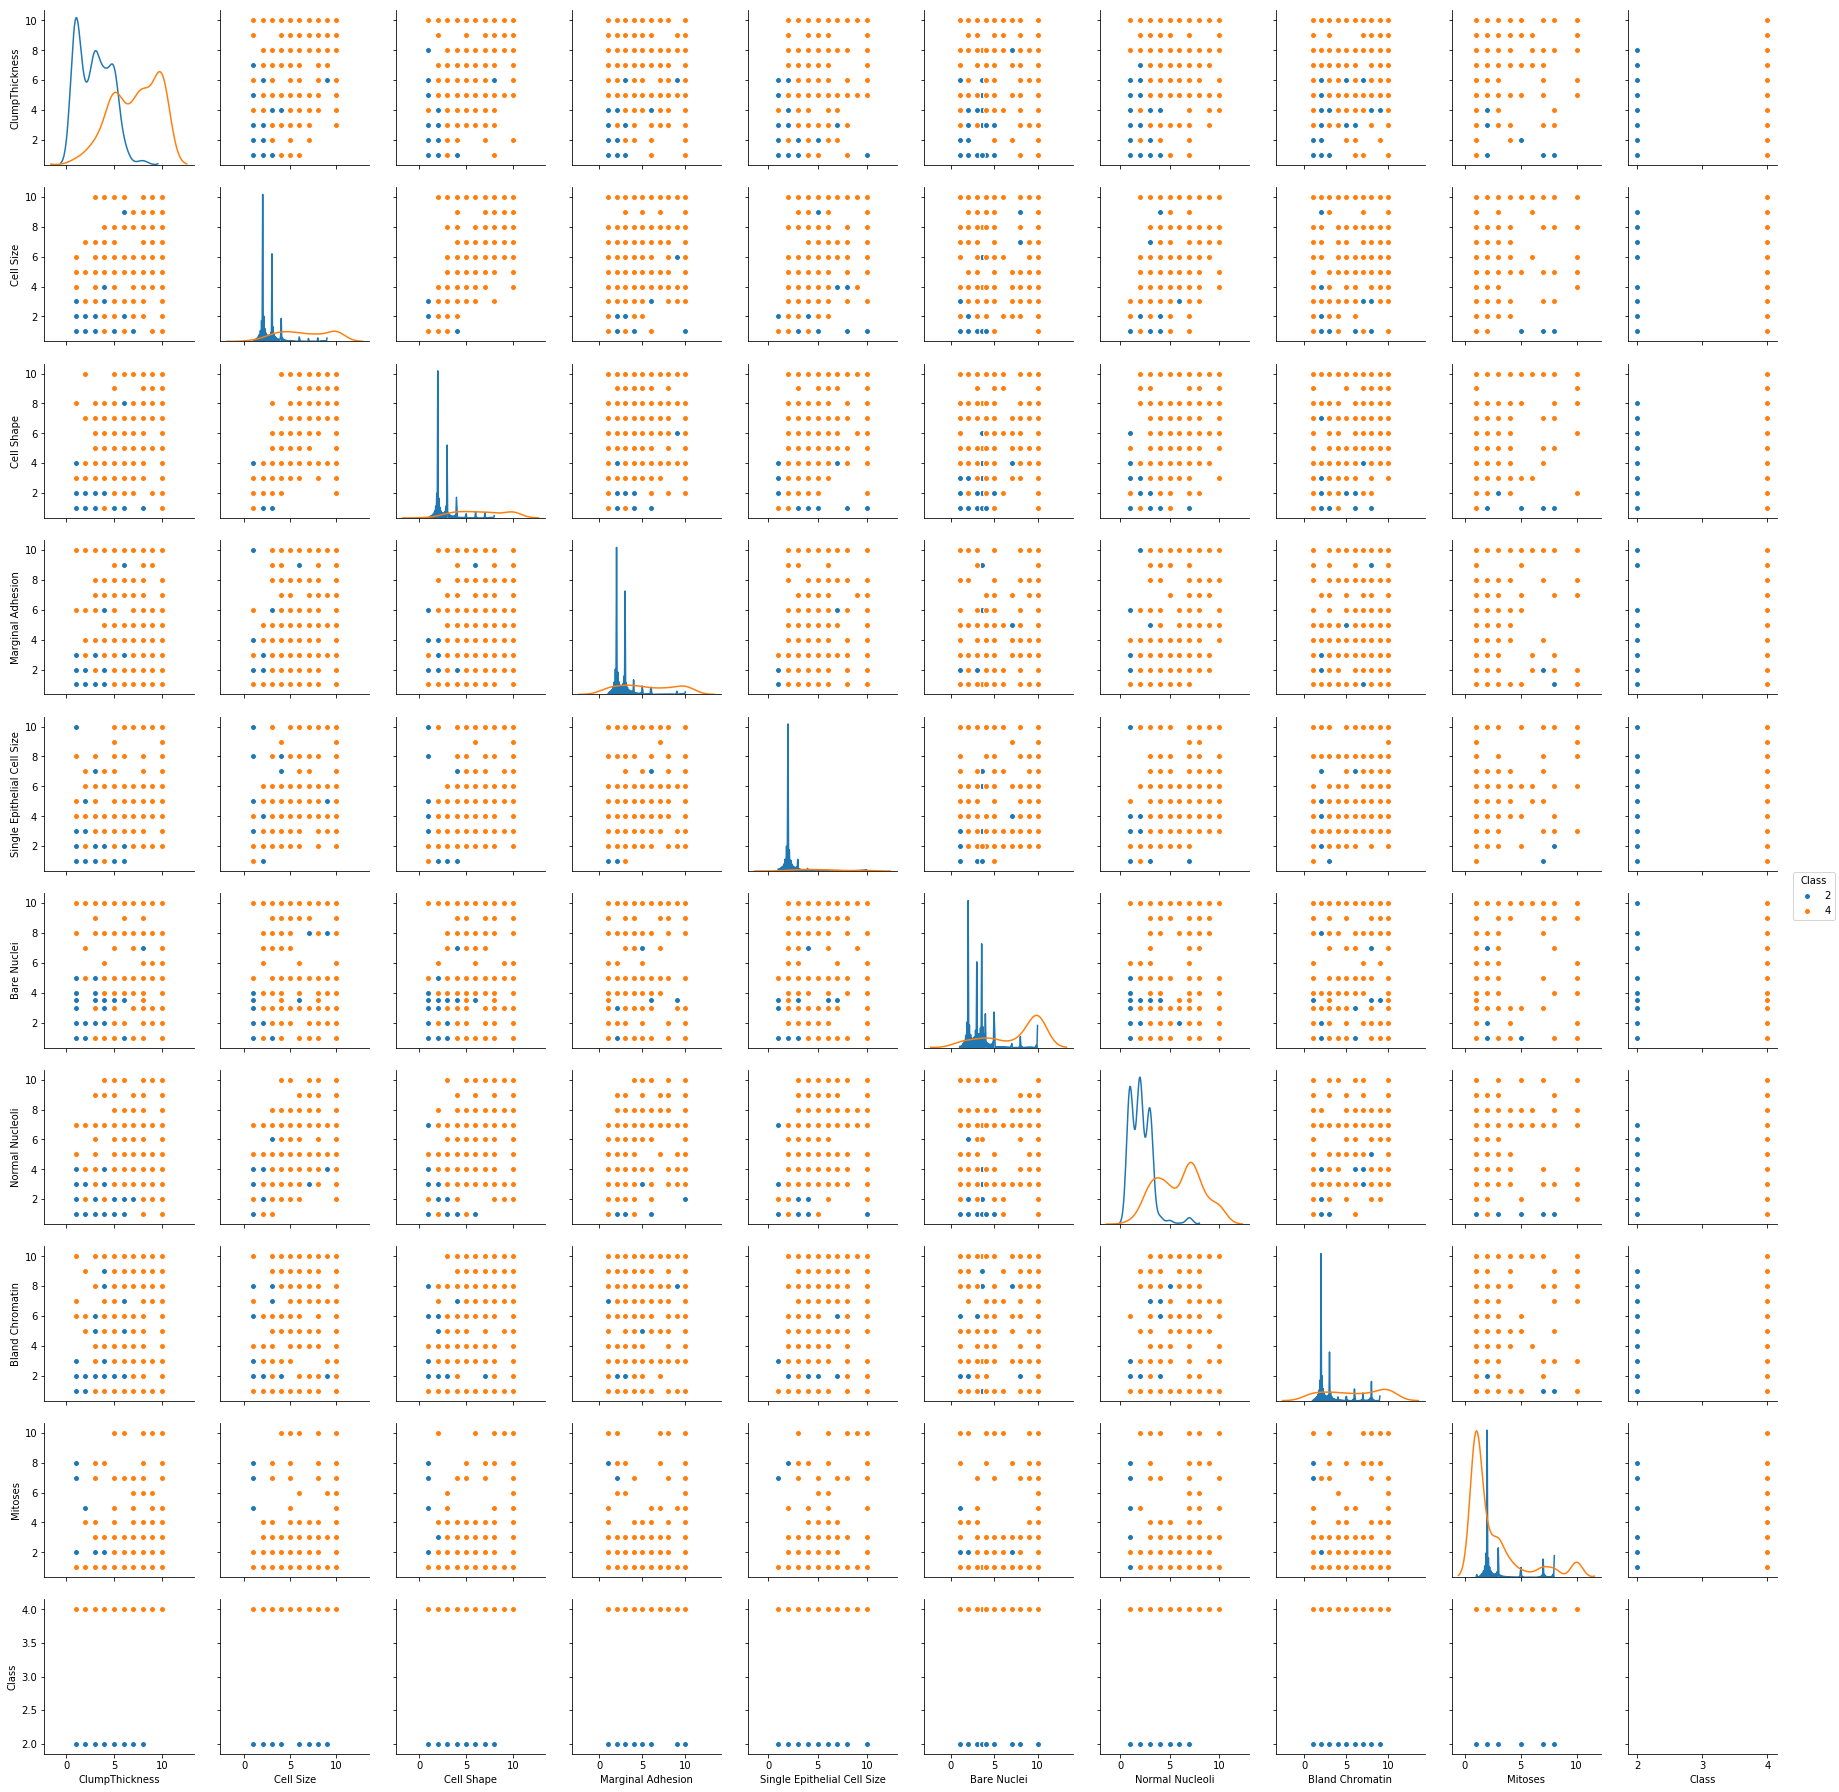

In [18]:
#Let us check for pair plots
sns.pairplot(df_BreastCancer,hue='Class',diag_kind='kde')

In [19]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [20]:
# We could see most of the outliers are now removed.

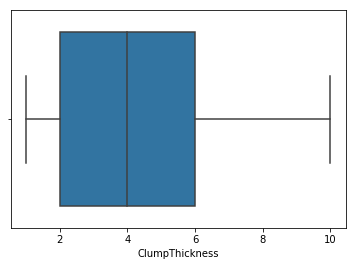

In [21]:
sns.boxplot(df_BreastCancer['ClumpThickness'])

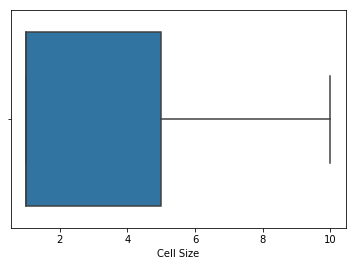

In [22]:
sns.boxplot(df_BreastCancer['Cell Size'])

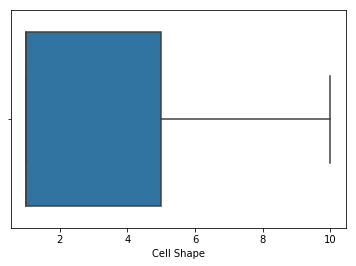

In [23]:
sns.boxplot(df_BreastCancer['Cell Shape'])

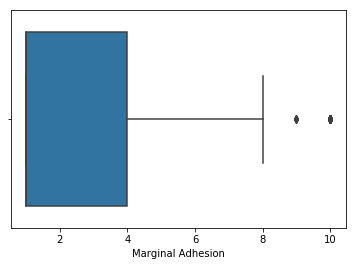

In [24]:
sns.boxplot(df_BreastCancer['Marginal Adhesion'])

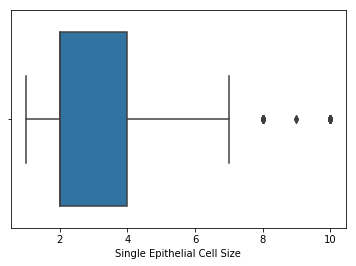

In [25]:
sns.boxplot(df_BreastCancer['Single Epithelial Cell Size'])

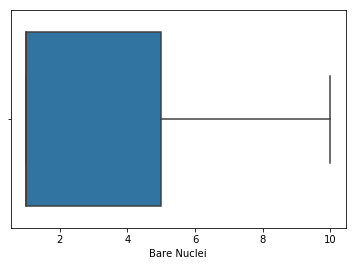

In [26]:
sns.boxplot(df_BreastCancer['Bare Nuclei'])

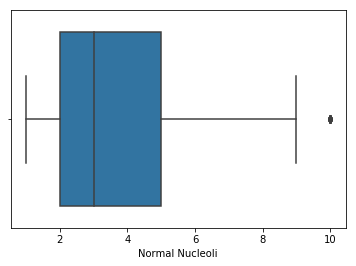

In [27]:
sns.boxplot(df_BreastCancer['Normal Nucleoli'])

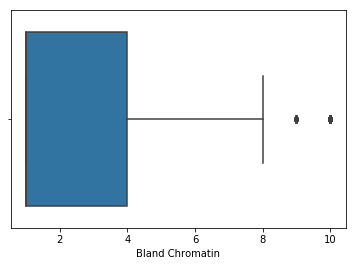

In [28]:
sns.boxplot(df_BreastCancer['Bland Chromatin'])

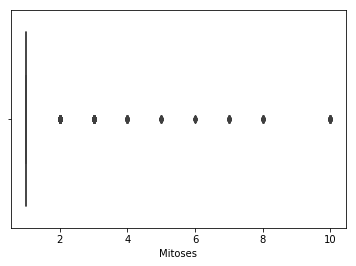

In [29]:
sns.boxplot(df_BreastCancer['Mitoses'])

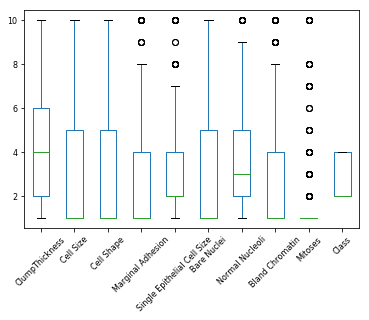

In [30]:
boxplot = df_BreastCancer.boxplot(rot=45, fontsize=8,grid=False)

In [31]:
#Treating outliers in Marginal Adhesion
df_BreastCancer['Marginal Adhesion'] = np.where(df_BreastCancer['Marginal Adhesion']>8,4,df_BreastCancer['Marginal Adhesion'])

In [32]:
#Treating outliers in Single Epithelial Cell Size
df_BreastCancer['Single Epithelial Cell Size'] = np.where(df_BreastCancer['Single Epithelial Cell Size']>7,4,df_BreastCancer['Single Epithelial Cell Size'])

In [33]:
#Treating outliers in Normal Nucleoli
df_BreastCancer['Normal Nucleoli'] = np.where(df_BreastCancer['Normal Nucleoli']>9,5,df_BreastCancer['Normal Nucleoli'])

In [34]:
#Treating outliers in Bland Chromatin
df_BreastCancer['Bland Chromatin'] = np.where(df_BreastCancer['Bland Chromatin']>8,4,df_BreastCancer['Bland Chromatin'])

In [35]:
#Treating outliers in Bland Chromatin
df_BreastCancer['Mitoses'] = np.where(df_BreastCancer['Mitoses']>1,1,df_BreastCancer['Mitoses'])

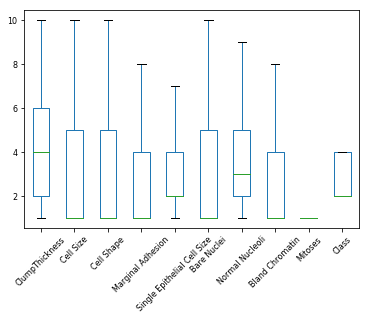

In [36]:
#After Treating Outliers
boxplot = df_BreastCancer.boxplot(rot=45, fontsize=8,grid=False)

# Q6 Create a covariance matrix for identifying Principal components

In [39]:
# PCA
# Step 1 - Create covariance matrix
X= df_BreastCancer.drop(columns=['Class'])
y=df_BreastCancer['Class']
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [41]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00207469 0.65503427 0.65799257 0.51358385 0.53286599 0.58970906
  0.59204811 0.52673915 0.        ]
 [0.65503427 1.00207469 0.91720873 0.70007429 0.72988504 0.67059336
  0.7209683  0.65484523 0.        ]
 [0.65799257 0.91720873 1.00207469 0.68139989 0.70593238 0.70319585
  0.73084817 0.64705093 0.        ]
 [0.51358385 0.70007429 0.68139989 1.00207469 0.6338087  0.63980101
  0.66714315 0.58378342 0.        ]
 [0.53286599 0.72988504 0.70593238 0.6338087  1.00207469 0.60954393
  0.61444596 0.62548572 0.        ]
 [0.58970906 0.67059336 0.70319585 0.63980101 0.60954393 1.00207469
  0.6763156  0.58761102 0.        ]
 [0.59204811 0.7209683  0.73084817 0.66714315 0.61444596 0.6763156
  1.00207469 0.63028271 0.        ]
 [0.52673915 0.65484523 0.64705093 0.58378342 0.62548572 0.58761102
  0.63028271 1.00207469 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [42]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.3198362  -0.00993645  0.82015324 -0.18472037  0.04169134  0.08863729
   0.42452114 -0.03194049  0.        ]
 [ 0.38675138  0.71059402  0.03274053 -0.03902785 -0.39991298 -0.26853413
  -0.24247496  0.22814317  0.        ]
 [ 0.38647789 -0.69545809  0.08141699  0.01099861 -0.33492284 -0.29792971
  -0.35050007  0.19088602  0.        ]
 [ 0.3443782  -0.04818433 -0.34890653  0.47569879  0.00482023 -0.18912702
   0.67457721  0.20052468  0.        ]
 [ 0.34661417 -0.04865676 -0.32017965 -0.28308493 -0.44103064  0.46932852
   0.1400356  -0.51034478  0.        ]
 [ 0.34774102  0.0783877   0.0796849   0.3997845   0.38673532 -0.21870317
  -0.28179649 -0.65570548  0.        ]
 [ 0.35845785  0.01885611 -0.01070515  0.23974326  0.30128992  0.6878985
  -0.28707762  0.40886119  0.        ]
 [ 0.33257997 -0.01029824 -0.29821627 -0.66370427  0.53971016 -0.23280256
   0.04062256  0.11275608  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        

# Q8 Find variance and cumulative variance by each eigen vector

In [43]:
tot_vals = sum(eig_vals)
var_exp = [( i /tot_vals ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance", cum_var_exp)

Cumulative Variance [ 69.50761732  76.05740413  81.58601345  86.86263742  91.21314626
  95.3937219   98.98447139 100.         100.        ]


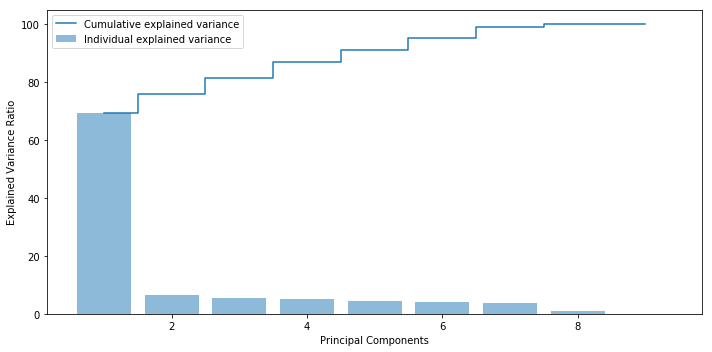

In [44]:
# Ploting and analyzing the variance
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [45]:
from sklearn.decomposition import PCA

In [46]:
X_centered = X - X.mean(axis=0)

In [47]:
pca = PCA(n_components=7)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
X_pca = pca.transform(X_centered)
X_pca.shape

(691, 7)

In [49]:
# Arrriving at PCA Components
pca_components=pca.components_
pca_components

array([[ 0.34772127,  0.45086564,  0.43899   ,  0.23899303,  0.17612701,
         0.50741939,  0.28911785,  0.23215492, -0.        ],
       [ 0.3441712 ,  0.35914081,  0.30197438, -0.04651005,  0.05330354,
        -0.80831815, -0.03883004,  0.03853683, -0.        ],
       [ 0.86453606, -0.3161093 , -0.24019467, -0.19193934, -0.10787676,
         0.14206724, -0.11642527, -0.11288395,  0.        ],
       [ 0.07343351, -0.23652999, -0.40693257,  0.36386747,  0.09552773,
        -0.23590218,  0.48437172,  0.58418839, -0.        ],
       [-0.04172089, -0.00993961,  0.06948464, -0.32226676,  0.06171527,
         0.08918039, -0.56663277,  0.74608443,  0.        ],
       [ 0.07703903,  0.01627014, -0.10371583,  0.78147926,  0.13520846,
        -0.01153192, -0.58591692, -0.10305593,  0.        ],
       [ 0.01117009,  0.64489895, -0.68000308, -0.19343895,  0.26914384,
         0.06469847, -0.04429197, -0.07464371, -0.        ]])

In [50]:
#Variance
pca.explained_variance_

array([38.30706728,  4.36728746,  3.68892536,  2.13803556,  1.6136388 ,
        1.41490576,  0.82152287])

# Q10 Find correlation between components and features

In [51]:
df_BreastCancer.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [52]:
X=df_BreastCancer.iloc[:,0:9]

In [53]:
X.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

In [54]:
# Building a correaltion between pca components and features
df_comp = pd.DataFrame(pca.components_,columns=(X.columns))
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.347721,0.450866,0.438990,0.238993,0.176127,0.507419,0.289118,0.232155,-0.0
1,0.344171,0.359141,0.301974,-0.046510,0.053304,-0.808318,-0.038830,0.038537,-0.0
2,0.864536,-0.316109,-0.240195,-0.191939,-0.107877,0.142067,-0.116425,-0.112884,0.0
3,0.073434,-0.236530,-0.406933,0.363867,0.095528,-0.235902,0.484372,0.584188,-0.0
4,-0.041721,-0.009940,0.069485,-0.322267,0.061715,0.089180,-0.566633,0.746084,0.0


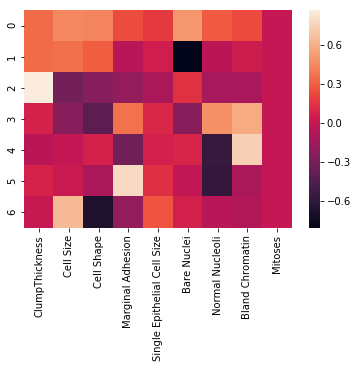

In [55]:
#Representing the pca components correlation with heatmap
sns.heatmap(df_comp)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [ ]:
df_jokes = pd.read_csv('jokes.csv')

In [ ]:
df_jokes.head(10)

In [ ]:
print(df_jokes.shape)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [ ]:
ratings = df_jokes.iloc[0:200,:]

In [ ]:
print(ratings.shape)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [ ]:
#Reaplace the the rating where 99 is given as 0
ratings.replace(to_replace=99,value=0,inplace=True)

In [ ]:
# Checking whether the value is replaced or not
ratings.head(10)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [ ]:
ratings_diff= pd.DataFrame(ratings.mean(),columns=['mean'])

In [ ]:
ratings_diff

In [ ]:
#Removing Number of jokes column
ratings_diff = ratings_diff[1:]

In [ ]:
#Top 10 jokes by mean
ratings_diff.sort_values(by=['mean'],ascending=False).head(10)